In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf

In [2]:
train_data = pd.read_csv("sign_mnist_train.csv")
test_data = pd.read_csv("sign_mnist_test.csv")

In [3]:
train_labels = train_data['label'].values
test_labels = test_data['label'].values
train_images = train_data.iloc[:, 1:].values
test_images = test_data.iloc[:, 1:].values

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [7]:
num_classes = 25

In [8]:
train_labels_encoded = to_categorical(train_labels, num_classes=num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes=num_classes)

In [9]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))


In [10]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [11]:
cnn_model.fit(train_images, train_labels_encoded, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
344/344 [==============================] - 7s 18ms/step - loss: 1.9483 - accuracy: 0.3996 - val_loss: 0.5738 - val_accuracy: 0.8641
Epoch 2/10
344/344 [==============================] - 6s 17ms/step - loss: 0.7018 - accuracy: 0.7640 - val_loss: 0.2056 - val_accuracy: 0.9616
Epoch 3/10
344/344 [==============================] - 6s 18ms/step - loss: 0.4133 - accuracy: 0.8604 - val_loss: 0.0829 - val_accuracy: 0.9918
Epoch 4/10
344/344 [==============================] - 6s 18ms/step - loss: 0.2704 - accuracy: 0.9073 - val_loss: 0.0392 - val_accuracy: 0.9971
Epoch 5/10
344/344 [==============================] - 7s 20ms/step - loss: 0.1985 - accuracy: 0.9331 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/10
344/344 [==============================] - 7s 21ms/step - loss: 0.1542 - accuracy: 0.9468 - val_loss: 0.0155 - val_accuracy: 0.9993
Epoch 7/10
344/344 [==============================] - 7s 20ms/step - loss: 0.1240 - accuracy: 0.9571 - val_loss: 0.0058 - val_accuracy: 0.9998

In [12]:
test_predictions = cnn_model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis=1)

225/225 [==============================] - 1s 3ms/step


In [15]:
correct_predictions = np.equal(test_labels, test_pred_labels)
accuracy = np.mean(correct_predictions)

true_positives = np.sum(correct_predictions & (test_labels == 1))
false_positives = np.sum((correct_predictions == 0) & (test_labels == 0))
false_negatives = np.sum((correct_predictions == 0) & (test_labels == 1))

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

In [41]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels_encoded)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

225/225 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9268
Test Loss: 0.2723
Test Accuracy: 0.9268


In [16]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9267986614612381
Precision: 1.0
Recall: 0.9513888888888888
F1-score: 0.9750889679715302


### import pandas as pd

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
cnn_comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Value': [accuracy, precision, recall, f1]
})

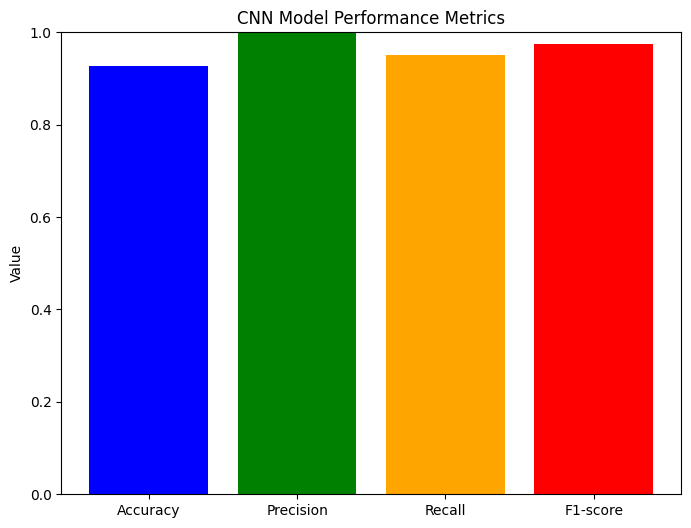

In [23]:
plt.figure(figsize=(8, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('CNN Model Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis range
plt.ylabel('Value')
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
cnn_predictions = cnn_model.predict(test_images)

225/225 [==============================] - 1s 3ms/step


In [26]:
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)


In [28]:
unique_labels = np.unique(test_labels)
num_classes = len(unique_labels)



In [32]:
confusion_mat = np.zeros((num_classes, num_classes), dtype=int)
for i in range(len(test_labels)):
    true_label_idx = np.where(unique_labels == test_labels[i])[0][0]
    predicted_label_idx = np.where(unique_labels == cnn_predicted_labels[i])[0][0]
    confusion_mat[true_label_idx][predicted_label_idx] += 1

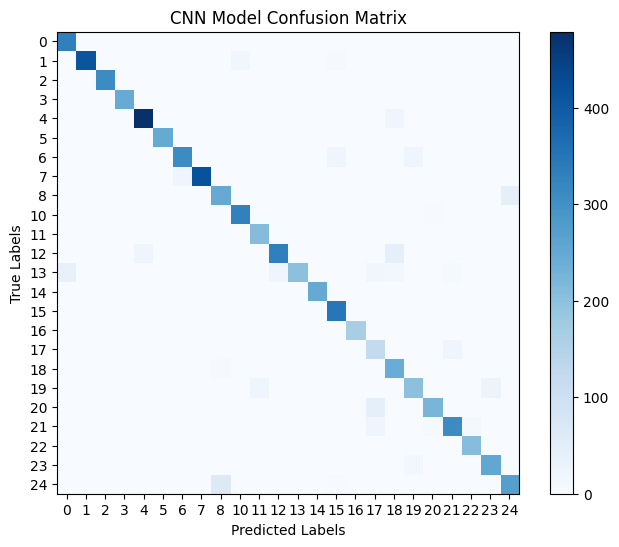

In [34]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, unique_labels)
plt.yticks(tick_marks, unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### ROC Curve without sklearn

In [37]:
num_classes = len(unique_labels)
tpr = {}
fpr = {}

for i in range(num_classes):
    true_positives = np.sum((test_labels == unique_labels[i]) & (cnn_predicted_labels == unique_labels[i]))
    false_positives = np.sum((test_labels != unique_labels[i]) & (cnn_predicted_labels == unique_labels[i]))
    true_negatives = np.sum((test_labels != unique_labels[i]) & (cnn_predicted_labels != unique_labels[i]))
    false_negatives = np.sum((test_labels == unique_labels[i]) & (cnn_predicted_labels != unique_labels[i]))
    
    tpr[i] = true_positives / (true_positives + false_negatives)
    fpr[i] = false_positives / (false_positives + true_negatives)


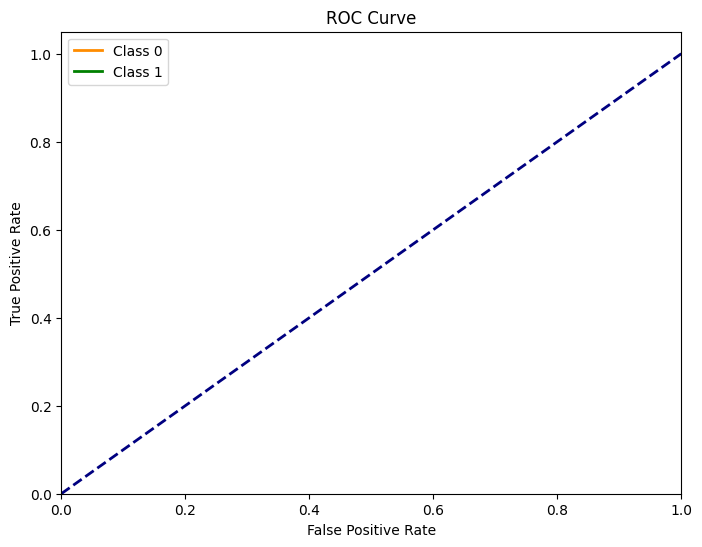

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='Class 0')
plt.plot(fpr[1], tpr[1], color='green', lw=2, label='Class 1')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [43]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels_encoded)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

225/225 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9268
Test Loss: 0.2723
Test Accuracy: 0.9268


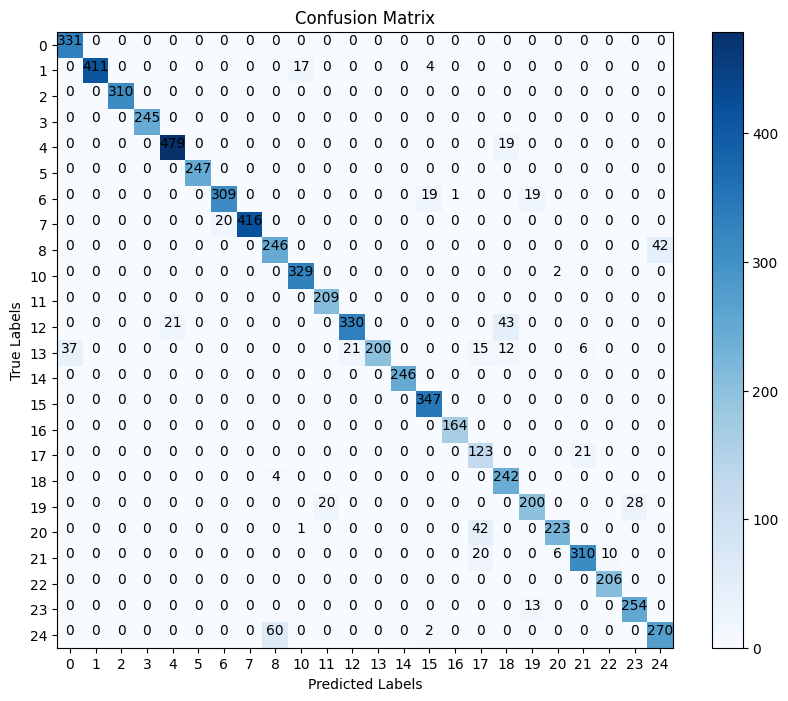

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already predicted labels for the test data
# Replace y_true_labels and y_pred_labels with your actual test labels and predicted labels

# Calculate the confusion matrix
num_classes = len(unique_labels)  # Replace with the number of classes in your dataset
confusion_mat = np.zeros((num_classes, num_classes), dtype=int)

for i in range(len(test_labels)):  # Assuming test_labels contains your true test labels
    true_label_idx = np.where(unique_labels == test_labels[i])[0][0]
    predicted_label_idx = np.where(unique_labels == cnn_predicted_labels[i])[0][0]
    confusion_mat[true_label_idx][predicted_label_idx] += 1

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, unique_labels)
plt.yticks(tick_marks, unique_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Annotate the heatmap with the count in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion_mat[i][j]), horizontalalignment="center", color="black")

plt.show()